In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

df = pd.read_csv('cacao_engineered.csv')
print(f"shape of dataset: {df.shape}")
#split data 75:25
x = df.loc[:, ~df.columns.isin(['Unnamed: 0', 'Rating'])]
y = df['Rating']

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, train_size=0.75)

#Random Forest regression with default values
model_default = RandomForestRegressor()

#fit model
model_default.fit(x1_train, y1_train)

#predict on model
y1_pred_def = model_default.predict(x1_test)

#evaluate model
mse_def = mean_squared_error(y1_test, y1_pred_def)
print("Mean Squared Error", mse_def)

rmse_def = mse_def**0.5
print("Root Mean Squared Error", rmse_def)

r2score = r2_score(y1_test, y1_pred_def)
#adjusted rscore is just rscore but the rscore can increase with additional features even though no improvement occurs for model's performance. 
#Basically adjusted negates the weakness of rscore
adjusted_r2score_def = 1- ((1 - r2score) * ((df.shape[0] - 1) / (df.shape[0] - df.shape[1] - 1)))
print("Adjusted R Squared Score: ", adjusted_r2score_def)

mae_def = (1/ df.shape[0]) * sum(abs(y1_test - y1_pred_def))
print(f"Mean Absolute Error: {mae_def}")
errors = abs(y1_test - y1_pred_def)
mape_def = (1/len(y1_test)) * sum(errors / y1_test) * 100
print(f"Mean Absolute Percentage Error: {mape_def}%")








shape of dataset: (1795, 23)
Mean Squared Error 0.22701252935588548
Root Mean Squared Error 0.47645831859238796
Adjusted R Squared Score:  0.08939402775896255
Mean Absolute Error: 0.09140966670284222
Mean Absolute Percentage Error: 13.065984672328524%


Above output is from the Random Forest Regression with the default settings. Currently, according to the Adjusted R Squared Score, the model is not performing well since it has a score close to 0. In other words, the features currently do not predict the ratings very well. The Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, and Mean Absolute Percentage Error currently don't have much meaning since we don't have other measurements to compare them to. So let's try using grid search to see parameters work best for Random Forest Regression. Let's first see what range of parameter works best for our model using Random Search.

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# df = pd.read_csv('cacao_engineered.csv')
# print(f"shape of dataset: {df.shape}")
# #split data 75:25
# x = df.loc[:, ~df.columns.isin(['Unnamed: 0', 'Rating'])]
# y = df['Rating']

# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)


model_random = RandomForestRegressor()
print(model_random.get_params())
param_grid = {
    'max_samples': [None, 5 ,20, 50 , 80, 100, 200],
    'max_depth': [None, 10,20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': ['sqrt', 'log2', 1],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'min_samples_split': [2,3,5, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4 , 5, 6, 7,8,9, 10]
}
random_search = RandomizedSearchCV(estimator=model_random, param_distributions=param_grid, n_iter=200, cv=5, error_score='raise', verbose=3, n_jobs=-1)
random_search.fit(x1_train, y1_train)
print('\n')
print(f"Best parameters from Random Search: {random_search.best_params_}")
model_random = random_search.best_estimator_
y1_pred_rand = model_random.predict(x1_test)

#evaluate model
mse_rand = mean_squared_error(y1_test, y1_pred_rand)
print("Mean Squared Error", mse_rand)

rmse_rand = mse_rand**0.5
print("Root Mean Squared Error", rmse_rand)

r2score = r2_score(y1_test, y1_pred_rand)
#adjusted rscore is just rscore but the rscore can increase with additional features even though no improvement occurs for model's performance. 
#Basically adjusted negates the weakness of rscore
adjusted_r2score_rand = 1- ((1 - r2score) * ((df.shape[0] - 1) / (df.shape[0] - df.shape[1] - 1)))
print("Adjusted R Squared Score: ", adjusted_r2score_rand)

mae_rand = (1/ df.shape[0]) * sum(abs(y1_test - y1_pred_rand))
print(f"Mean Absolute Error: {mae_rand}")
errors = abs(y1_test - y1_pred_rand)
mape_rand = (1/len(y1_test)) * sum(errors / y1_test) * 100
print(f"Mean Absolute Percentage Error: {mape_rand}%")

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Best parameters from Random Search: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': 90}
Mean Squared Error 0.21263719706722464
Root Mean Squared Error 0.4611260099660663
Adjusted R Squared Score:  0.1470572037613871
Mean Absolute Error: 0.09034667850048711
Mean Absolute Percentage Error: 13.086725110639719%


With the best parameters returned, we can use these values to explore nearby values using Grid Search. First, let's examine the performance evaluation for the model using these parameters. Comparing to the default mode, MSE, RMSE, and Adjsted R Square Score barely changed at all. So no reduction in error came from randomly searching for the best parameters and the Adjusted R Square score shows that the model still struggles to capture the data trend from the dataset features. MAPE didn't receive much change either. Let's see if we can gain more insights through Grid Search.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# df = pd.read_csv('cacao_engineered.csv')
# print(f"shape of dataset: {df.shape}")
# #split data 75:25
# x = df.loc[:, ~df.columns.isin(['Unnamed: 0', 'Rating'])]
# y = df['Rating']

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, train_size=0.75)

#Random Forest regression with gridsearch values
model_grid = RandomForestRegressor()

#trying a range of values close to the Random Search parameters
#Best parameters from Random Search: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_samples': None, 'max_features': 'log2', 'max_depth': 20}
param_grid = {
    'max_samples': [None, 100, 500],
    'max_depth': [None, 80, 90, 100],
    'max_features': ['log2'],
    'n_estimators': [200, 300, 400],
    'min_samples_split': [4,5,6],
    'min_samples_leaf': [2, 3, 4]
}
grid_search = GridSearchCV(estimator = model_grid, param_grid = param_grid, verbose= 4, error_score='raise', n_jobs = -1)
grid_result = grid_search.fit(x1_train, y1_train)
print(f"best params for the model are {grid_search.best_params_}")

#predict on model with best parameters from grid search
model_grid = grid_search.best_estimator_
y1_pred_grid = model_grid.predict(x1_test)
#evaluate model
mse_grid = mean_squared_error(y1_test, y1_pred_grid)
print("Mean Squared Error", mse_grid)
rmse_grid = mse_grid**0.5
print("Root Mean Squared Error", rmse_grid)
r2score = r2_score(y1_test, y1_pred_grid)
#adjusted rscore is just rscore but the rscore only improves if additional features actually improves the model's performance. 
#Basically it negates the weakness of rscore which is that the score increases as the number of features increase
adjusted_r2score_grid = 1- ((1 - r2score) * ((df.shape[0] - 1) / (df.shape[0] - df.shape[1] - 1)))
print("Adjusted R Squared Score: ", adjusted_r2score_grid)

mae_grid = (1/ df.shape[0]) * sum(abs(y1_test - y1_pred_grid))
print(f"Mean Absolute Error: {mae_grid}")
errors = abs(y1_test - y1_pred_grid)
mape_grid = (1/len(y1_test)) * sum(errors / y1_test) * 100
print(f"Mean Absolute Percentage Error: {mape_grid}%")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
best params for the model are {'max_depth': 90, 'max_features': 'log2', 'max_samples': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 400}
Mean Squared Error 0.19239009029421242
Root Mean Squared Error 0.43862294775149696
Adjusted R Squared Score:  0.0942653692982407
Mean Absolute Error: 0.0885106910336538
Mean Absolute Percentage Error: 11.795901925092744%


Even with Grid Search, the model isn't that much better. MSE, RMSE, Adjusted R Squared score, and MAPE still did not change much. MSE and RMSE increase slightly and Adjusted R Sqaured Score reduced slightly. This suggest a tiny worsening of the model. MAPE increases as well which makes sense because the error in other metrics increased. Anyways, it looks like the model doesn't improve much regardless of what parameter settings we used.  However, there is still something we can do. According to our default, Grid Search setting, and especially Random Search, our Adjusted R Squared score show that the features do not predict the variance in chocolate ratings well, further proven by the fact that Adjusted R Squared score penalizes the score when adding in a new feature. The low score may indicate that our dataset is poorly engineered for the model to train on. Considering there are 22 features and a majority of them are from One Hot Encoding, this might be the case. Let's take a look at the feature importance of the dataset.   

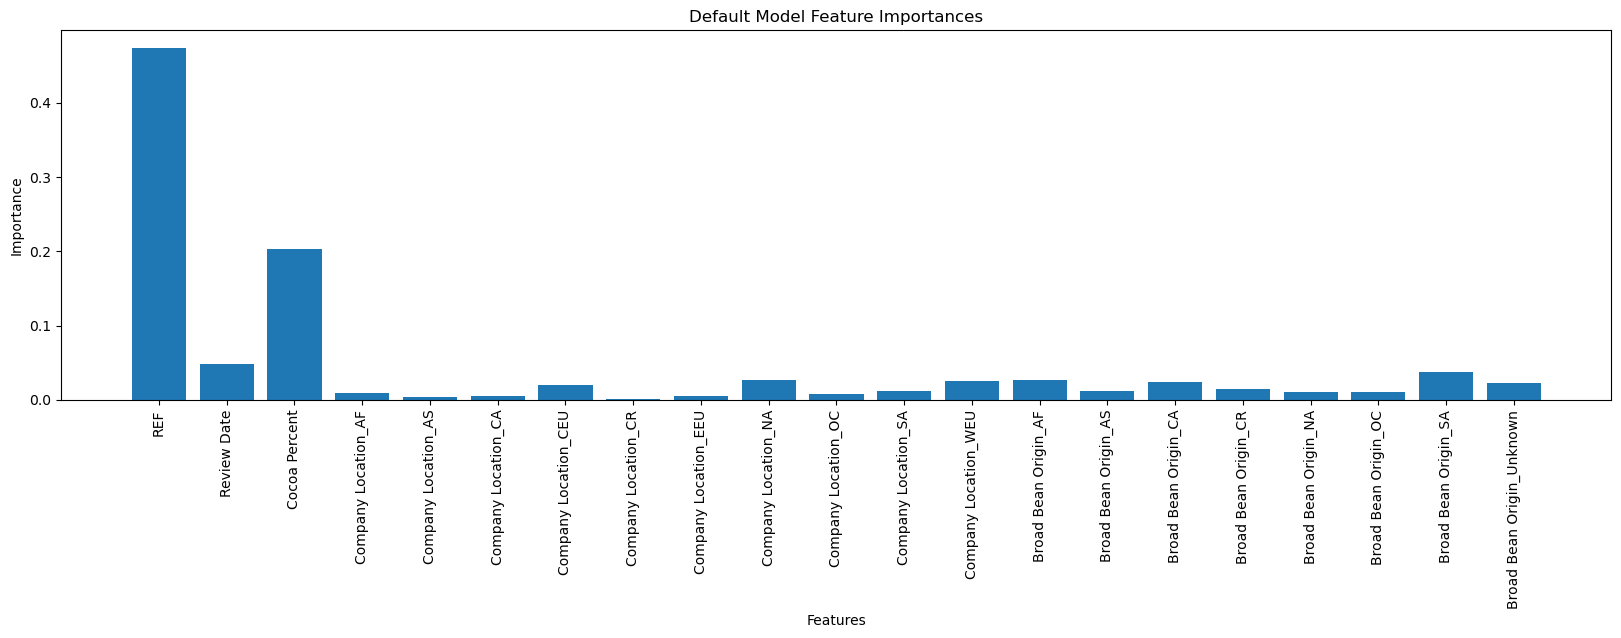

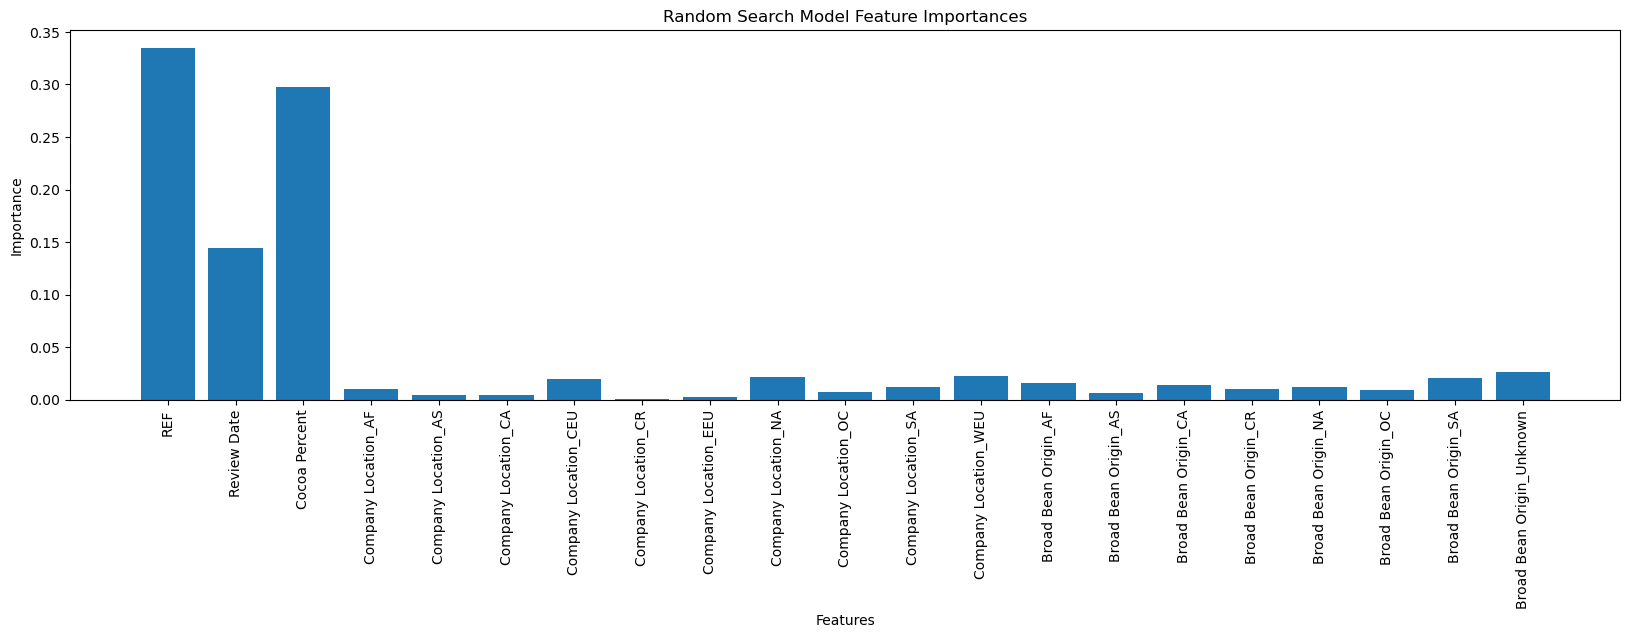

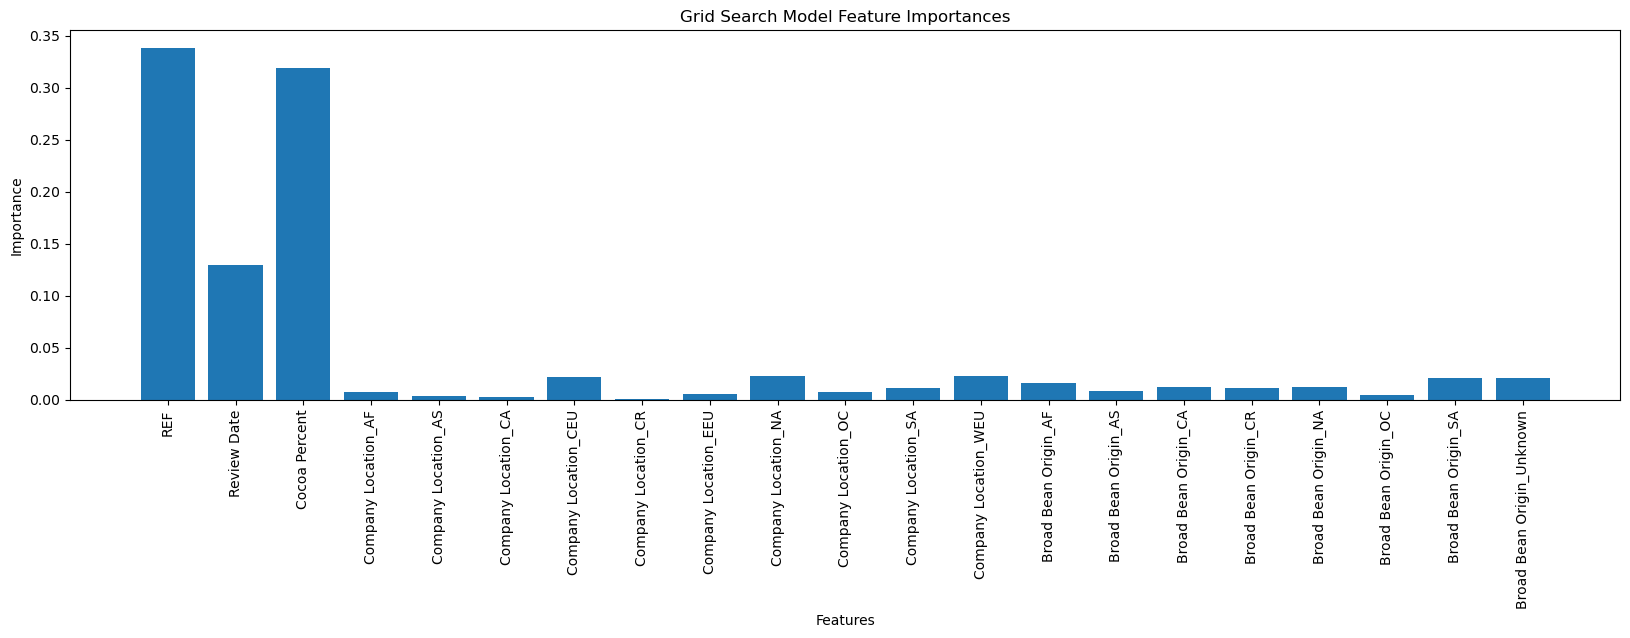

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# df = pd.read_csv('cacao_engineered.csv')
# #split data 75:25
# x = df.loc[:, ~df.columns.isin(['Unnamed: 0', 'Rating'])]
# y = df['Rating']

#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

#model with default settings

# model_import = RandomForestRegressor()
# model_import.fit(x_train, y_train)

importants_def = list(model_default.feature_importances_)
importants_rand = list(model_random.feature_importances_)
importants_grid = list(model_grid.feature_importances_)
important_features_def = []
important_features_rand = []
important_features_grid = []
df_features = list(x.columns)
#pair each feature with their importance values
for feature, important in zip(df_features, importants_def):
    important_features_def.append((feature, important))
for feature,important in zip(df_features, importants_rand):
    important_features_rand.append((feature, important))
for feature,important in zip(df_features, importants_grid):
    important_features_grid.append((feature, important))
important_features_def = sorted(important_features_def, key = lambda tuple: tuple[1], reverse=True)
important_features_rand = sorted(important_features_rand, key = lambda tuple: tuple[1], reverse=True)
important_features_grid = sorted(important_features_grid, key = lambda tuple: tuple[1], reverse=True)

important_list = [('Default', importants_def), ('Random Search', importants_rand), ('Grid Search', importants_grid)]
#model_strs = ['Default', 'Random Search', 'Grid Search']
# for tuple in important_features:
#     print(f"Feature: {tuple[0]:20}       Importance:{tuple[1]}")

#bar graph of the important features
for pair in important_list:
    x_values = list(range(len(pair[1])))
    figure = plt.figure()
    figure.set_figwidth(20)
    plt.bar(x_values, pair[1], orientation='vertical') 
    plt.xticks(x_values, df_features, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'{pair[0]} Model Feature Importances')
    plt.show()

The Bar graph of feature importances shows the vast majority of features contribute little to accurately predicting a chocolate's rating. Only 2 features received an importance score above 0.1 and they're REF and Cocoa percent. The review date barely reaches above 0.1 in the Grid Search chart. Quick reminder, REF is a value that indicates how recent the chocolate entry entered the dataset. A higher REF number means more recent. Since REF and cocoa percent are the only two features that demonstrate a great influence on model prediction. Let's see if we can get better results with just these features. Let's repeat our process by doing Random Search again.

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

df = pd.read_csv('cacao_engineered.csv')
#split data 75:25
x = df.loc[:, df.columns.isin(['REF', 'Cocoa Percent'])]
y = df['Rating']
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, train_size=0.75)


model_random2 = RandomForestRegressor()
param_grid = {
    'max_samples': [None, 5 ,20, 50 , 80, 100, 200],
    'max_depth': [None, 10,20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': ['sqrt', 'log2', 1],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'min_samples_split': [2,3,5, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4 , 5, 6, 7,8,9, 10]
}
random_search = RandomizedSearchCV(estimator=model_random2, param_distributions=param_grid, n_iter=200, cv=5, error_score='raise', verbose=3, n_jobs=-1)
random_search.fit(x2_train, y2_train)
model_random2 = random_search.best_estimator_
model_random2.fit(x2_train, y2_train)
y2_pred_rand2 = model_random2.predict(x2_test)
print('\n')
print(f"Best parameters from Random Search: {random_search.best_params_}")

#evaluate model
mse_rand2 = mean_squared_error(y2_test, y2_pred_rand2)
print("Mean Squared Error", mse_rand2)

rmse_rand2 = mse_rand2**0.5
print("Root Mean Squared Error", rmse_rand2)

r2score = r2_score(y2_test, y2_pred_rand2)
#adjusted rscore is just rscore but the rscore can increase with additional features even though no improvement occurs for model's performance. 
#Basically adjusted negates the weakness of rscore
adjusted_r2score_rand2 = 1- ((1 - r2score) * ((df.shape[0] - 1) / (df.shape[0] - df.shape[1] - 1)))
print("Adjusted R Squared Score: ", adjusted_r2score_rand2)

mae_rand2 = (1/ df.shape[0]) * sum(abs(y2_test - y2_pred_rand2))
print(f"Mean Absolute Error: {mae_rand2}")
errors = abs(y2_test - y2_pred_rand2)
mape_rand2 = (1/len(y2_test)) * sum(errors / y2_test) * 100
print(f"Mean Absolute Percentage Error: {mape_rand2}%")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Best parameters from Random Search: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': 200, 'max_features': 'log2', 'max_depth': 60}
Mean Squared Error 0.21162275748178153
Root Mean Squared Error 0.46002473572817965
Adjusted R Squared Score:  0.08275626415549842
Mean Absolute Error: 0.09297245103240936
Mean Absolute Percentage Error: 12.701197493743487%


Approximately the same values as the first Random Search and Grid Search. Adjusted R Squared score had decreased by half though.  Let's use these parameter values to perform Grid Search.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# df = pd.read_csv('cacao_engineered.csv')
# print(f"shape of dataset: {df.shape}")
# #split data 75:25
# x = df.loc[:, df.columns.isin(['REF', 'Cocoa Percent'])]
# y = df['Rating']

# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

#Random Forest regression with gridsearch values
model_grid2 = RandomForestRegressor()

#trying a range of values close to the Random Search parameters
#Best parameters from Random Search: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 200, 'max_features': 'log2', 'max_depth': 90}
param_grid = {
    'max_samples': [None, 200, 300, 100],
    'max_depth': [None, 80, 90, 100],
    'max_features': ['sqrt'],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [4,5,6],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(estimator = model_grid2, param_grid = param_grid, verbose= 4, error_score='raise', n_jobs = -1)
grid_result = grid_search.fit(x2_train, y2_train)
print(f"best params for the model are {grid_search.best_params_}")

#predict on model with best parameters from grid search
model_grid2= grid_search.best_estimator_
y2_pred_grid2 = model_grid2.predict(x2_test)
#evaluate model
mse_grid2 = mean_squared_error(y2_test, y2_pred_grid2)
print("Mean Squared Error", mse_grid2)
rmse_grid2 = mse_grid2**0.5
print("Root Mean Squared Error", rmse_grid2)
r2score = r2_score(y2_test, y2_pred_grid2)
#adjusted rscore is just rscore but the rscore only improves if additional features actually improves the model's performance. 
#Basically it negates the weakness of rscore which is that the score increases as the number of features increase
adjusted_r2score_grid2 = 1- ((1 - r2score) * ((df.shape[0] - 1) / (df.shape[0] - df.shape[1] - 1)))
print("Adjusted R Squared Score: ", adjusted_r2score_grid2)

mae_grid2 = (1/ df.shape[0]) * sum(abs(y2_test - y2_pred_grid2))
print(f"Mean Absolute Error: {mae_grid2}")
errors = abs(y2_test - y2_pred_grid2)
mape_grid2 = (1/len(y2_test)) * sum(errors / y2_test) * 100
print(f"Mean Absolute Percentage Error: {mape_grid2}%")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
best params for the model are {'max_depth': 100, 'max_features': 'sqrt', 'max_samples': 200, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error 0.21472557428742195
Root Mean Squared Error 0.46338490942997046
Adjusted R Squared Score:  0.06930761944302344
Mean Absolute Error: 0.09285132975195648
Mean Absolute Percentage Error: 12.760752799421265%


The measurements here don't look like that have improved much. Thus, it seems that Random Forest Regression struggles to predict on the dataset regardless of whether the geographical features are included or not. Let's plot the data we gathered.

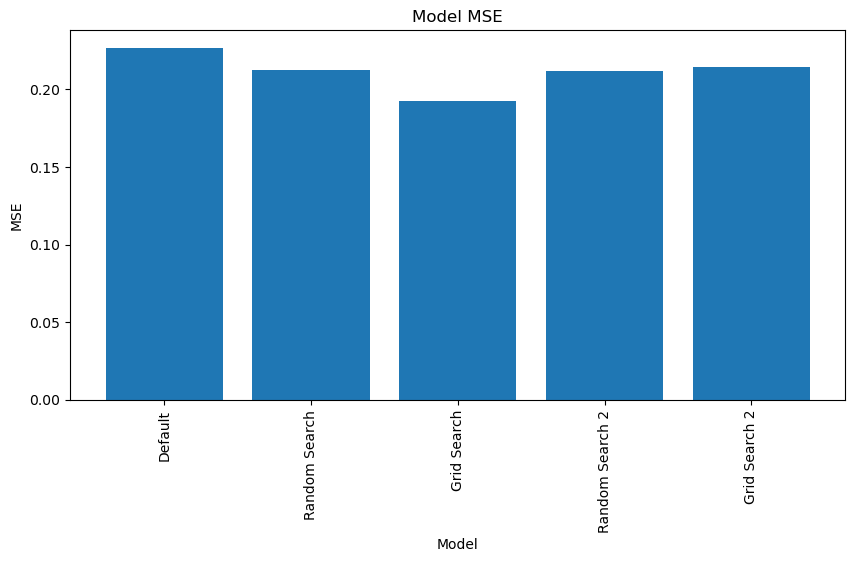

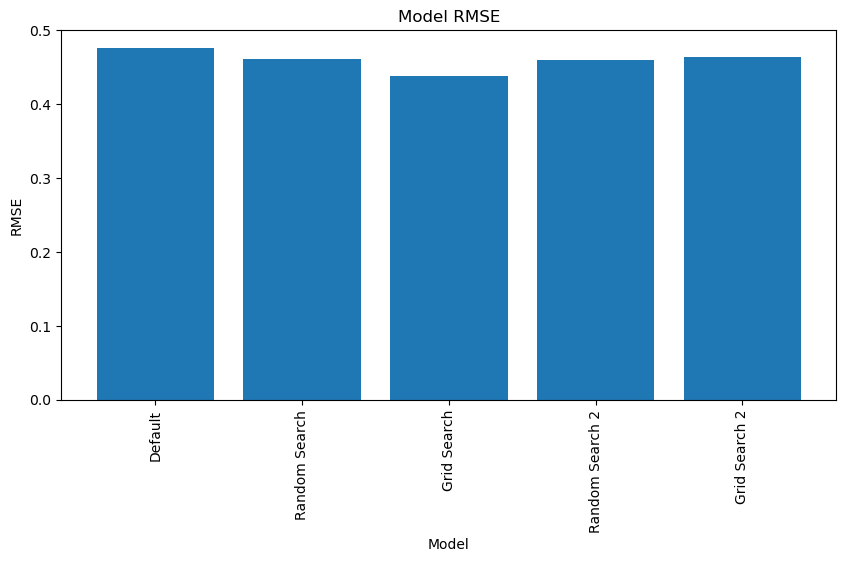

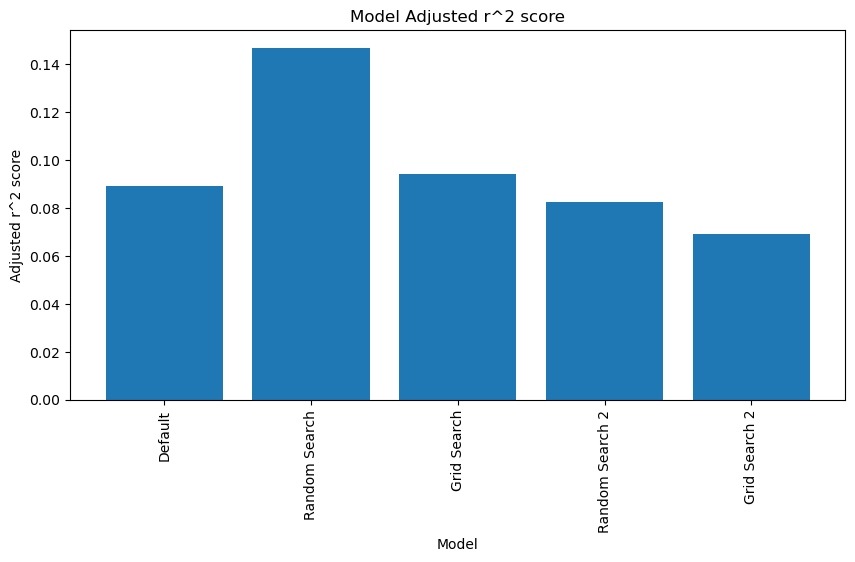

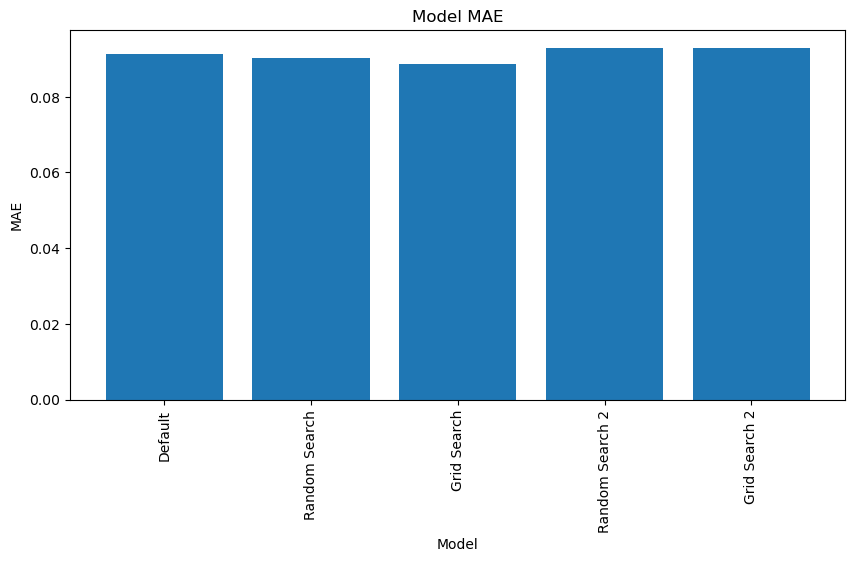

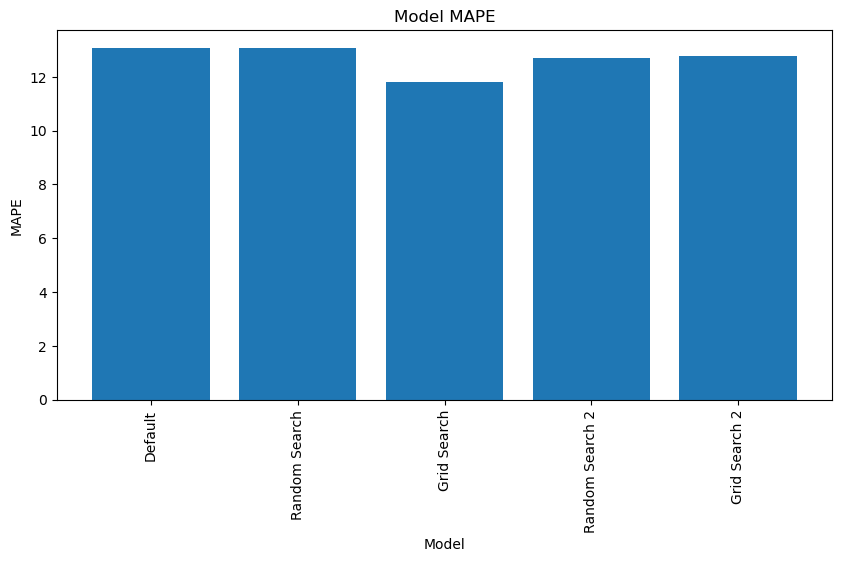

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# df = pd.read_csv('cacao_engineered.csv')
# print(f"shape of dataset: {df.shape}")
# #split data 75:25
# x = df.loc[:, ~df.columns.isin(['Unnamed: 0', 'Rating'])]
# y = df['Rating']

# our models are model_default, model_random, model_grid, model_random2, model_grid2
model_list = ['Default', 'Random Search', 'Grid Search', 'Random Search 2', 'Grid Search 2']
metric_strs = ["MSE", "RMSE", "Adjusted r^2 score", "MAE", "MAPE"]
mse_list = [mse_def, mse_rand, mse_grid, mse_rand2, mse_grid2]
rmse_list = [rmse_def, rmse_rand, rmse_grid, rmse_rand2, rmse_grid2]
adjusted_r2score_list = [adjusted_r2score_def, adjusted_r2score_rand, adjusted_r2score_grid, adjusted_r2score_rand2, adjusted_r2score_grid2]
mae_list = [mae_def, mae_rand, mae_grid, mae_rand2, mae_grid2]
acc_list = [mape_def, mape_rand, mape_grid, mape_rand2, mape_grid2]
metric_list = [mse_list, rmse_list, adjusted_r2score_list, mae_list, acc_list]
x_values = list(range(len(model_list)))

for index, metric in enumerate(metric_list):
    #bar chart
    figure = plt.figure()
    figure.set_figwidth(10)
    plt.bar(x_values, metric, orientation='vertical')
    plt.xticks(x_values, model_list, rotation=90)
    plt.xlabel("Model")
    plt.ylabel(f"{metric_strs[index]}")
    plt.title(f"Model {metric_strs[index]}")
    plt.show()

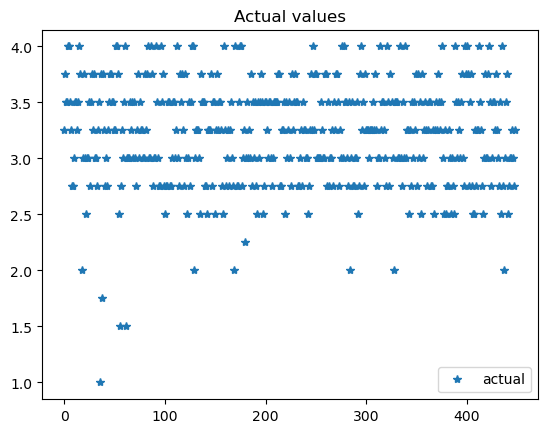

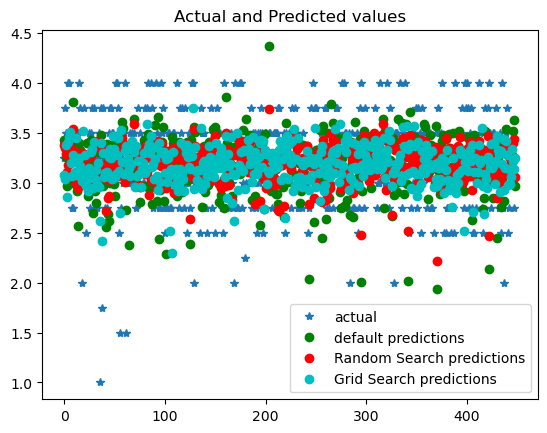

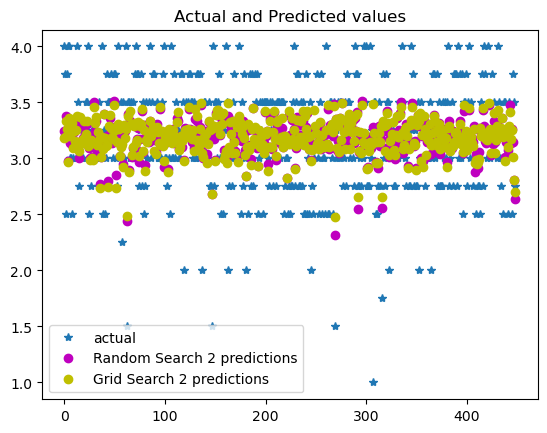

In [96]:

entry_num1 = list(range(len(x1_test)))
entry_num2 = list(range(len(x2_test)))

#plot just the actual values
plt.plot(entry_num1, y1_test, '*', label='actual')
plt.legend()
plt.title('Actual values')
plt.show()
#plot actual values
# figure = plt.figure()
# figure.set_figwidth(10)
# figure.set_figwidth(10)
plt.plot(entry_num1, y1_test, '*', label='actual')
#plot predicted values
plt.plot(entry_num1, y1_pred_def, 'og', label='default predictions')
plt.plot(entry_num1, y1_pred_rand, 'or', label='Random Search predictions')
plt.plot(entry_num1, y1_pred_grid, 'oc', label='Grid Search predictions')
plt.legend()
plt.title('Actual and Predicted values')
plt.show()

#plot actual values
plt.plot(entry_num2, y2_test, '*', label='actual')
#plot predicted values
plt.plot(entry_num2, y2_pred_rand2, 'om', label='Random Search 2 predictions')
plt.plot(entry_num2, y2_pred_grid2, 'oy', label='Grid Search 2 predictions')
plt.legend()
plt.title('Actual and Predicted values')
plt.show()
